# Titanic - Machine Learning from Disaster

## Ensemble Random Forests

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,0
1,1,1,0,38.0,1,0,596,71.28,0,0
2,1,3,0,26.0,0,0,669,7.92,2,0
3,1,1,0,35.0,1,0,49,26.55,2,0
4,0,3,1,35.0,0,0,472,8.05,2,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,0
887,1,1,0,19.0,0,0,14,30.00,2,0
888,0,3,0,29.0,1,2,675,11.72,2,0
889,1,1,1,26.0,0,0,8,30.00,0,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 7), (223,))

## Random Forests

In [8]:
from common import functions as func

from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_leaf=3,
    n_estimators=150,
    n_jobs=-1)

clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

func.show_model_result(clf, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.7877095  0.81460674 0.81460674 0.78089888 0.83707865]
Mean = 0.81 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[122  12]
 [ 28  61]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       134
           1       0.84      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.84
Sensitivity aka Recall: 0.69
F1-Score: 0.75


__Check the most relevant features for the training model__

In [10]:
featimps = clf.feature_importances_
pctimps = list(map(lambda fi: round(fi * 100), featimps))

pd.DataFrame({
    "Features": X_train.columns, 
    "Relevance (%)": pctimps
})

,Features,Relevance (%)
0,Pclass,15
1,Sex,45
2,SibSp,6
3,Parch,5
4,Ticket,20
5,Embarked,4
6,AgeGroup,5


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.80
----------------------------------------------------------------------


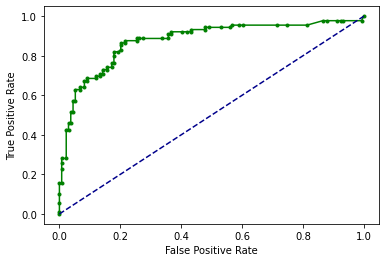

In [11]:
label = "Random Forest Classifier"
func.show_curve_roc(clf, X_test, y_test, y_predict, label=label)

__Compare Ground Truth vs Prediction Model__

In [12]:
X_test_result = X_test.copy()
X_test_result["Ground Truth"] = y_test
X_test_result["Prediction"] = y_predict

In [13]:
X_test_result[
    (X_test_result["Ground Truth"] != X_test_result["Prediction"]) 
    # &
    # (X_test_result["Sex"] == 0) 
]

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,AgeGroup,Ground Truth,Prediction
709,3,1,1,1,189,0,0,1,0
621,1,1,1,0,56,2,0,1,0
447,1,1,0,0,45,2,0,1,0
192,3,0,1,0,406,2,0,1,0
673,2,1,0,0,145,2,0,1,0
141,3,0,0,0,332,2,0,1,0
235,3,0,0,0,677,2,0,0,1
204,3,1,0,0,530,2,0,1,0
23,1,1,0,0,42,2,0,1,0
362,3,0,0,1,211,0,0,0,1


In [14]:
train_df[train_df["Ticket"] == 423]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
165,1,3,1,9.0,0,2,423,6.84,2,1
328,1,3,0,31.0,1,1,423,6.84,2,0
548,0,3,1,33.0,1,1,423,6.84,2,0
